In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Stocks/libs',nb_path)
sys.path.insert(0,nb_path)
#os.unlink(nb_path)

Mounted at /content/drive


In [ ]:
#!pip install --target=$nb_path yfinance

  Using cached yfinance-0.1.69-py2.py3-none-any.whl (26 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
  Using cached lxml-4.7.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (6.4 MB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached charset_normalizer-2.0.10-py3-none-any.whl (39 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets 

import os
from torch import optim
from torch.optim import lr_scheduler
from torch import nn

import time
from sklearn.metrics import accuracy_score
import random
import math
from  scipy.signal import find_peaks

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
print(f"available {device} device ")

device = torch.device(device)

available cpu device 


In [ ]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    
    learn_env.seed(seed)
    learn_env.action_space.seed(100)

In [ ]:
class observation_space:
    def __init__(self, n):
        self.shape = (n,)

In [ ]:
class action_space:
    def __init__(self, n):
        self.n = n
    def seed(self, seed):
        pass
    def sample(self):
        return random.randint(0, self.n - 1)

In [ ]:
class Finance:
    url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
    def __init__(self, symbol, features, window, lags,
                 leverage=1, min_performance=0.85,
                 start=0, end=None, mu=None, std=None):
        self.symbol = symbol
        self.features = features
        self.n_features = len(features)
        self.window = window
        self.lags = lags
        self.leverage = leverage
        self.min_performance = min_performance
        self.start = start
        self.end = end
        self.mu = mu
        self.std = std
        self.observation_space = observation_space(self.lags)
        self.action_space = action_space(2)
        self._get_data()
        self._prepare_data()
    def _get_data(self):
        self.raw = pd.read_csv(self.url, index_col=0,
                               parse_dates=True).dropna()
    def _prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol])
        self.data = self.data.iloc[self.start:]
        self.data['r'] = np.log(self.data / self.data.shift(1))
        self.data.dropna(inplace=True)
        self.data['s'] = self.data[self.symbol].rolling(
                                              self.window).mean() 
        self.data['m'] = self.data['r'].rolling(self.window).mean()
        self.data['v'] = self.data['r'].rolling(self.window).std()
        self.data.dropna(inplace=True)
        if self.mu is None:
            self.mu = self.data.mean()
            self.std = self.data.std()
        self.data_ = (self.data - self.mu) / self.std
        self.data_['d'] = np.where(self.data['r'] > 0, 1, 0)
        self.data_['d'] = self.data_['d'].astype(int)
        if self.end is not None:
            self.data = self.data.iloc[:self.end - self.start]
            self.data_ = self.data_.iloc[:self.end - self.start]
    def _get_state(self):
        return self.data_[self.features].iloc[self.bar -
                                self.lags:self.bar]
    def seed(self, seed):
        random.seed(seed)
        np.random.seed(seed)
    def reset(self):
        self.treward = 0
        self.accuracy = 0
        self.performance = 1
        self.bar = self.lags
        state = self.data_[self.features].iloc[self.bar-
                        self.lags:self.bar]
        return state.values
    def step(self, action):
        correct = action == self.data_['d'].iloc[self.bar]
        ret = self.data['r'].iloc[self.bar] * self.leverage
        reward_1 = 1 if correct else 0
        reward_2 = abs(ret) if correct else -abs(ret)
        self.treward += reward_1
        self.bar += 1
        self.accuracy = self.treward / (self.bar - self.lags)
        self.performance *= math.exp(reward_2)
        if self.bar >= len(self.data):
            done = True
        elif reward_1 == 1:
            done = False
        elif (self.performance < self.min_performance and
              self.bar > self.lags + 15):
            done = True
        else:
            done = False
        state = self._get_state()
        info = {}
        return state.values, reward_1 + reward_2 * 252, done, info

In [ ]:
class action_space:
    def __init__(self, n):
        self.n = n
    def seed(self, seed):
        random.seed(seed)
    def sample(self):
        return random.randint(0, self.n - 1)
class observation_space:
    def __init__(self, n):
        self.shape = (n,)
    

In [ ]:


class AttentionK1(nn.Module):
  def __init__(self,):
    super().__init__()
    return

class Encoder(nn.Module):
  def __init__(self,fe,hidden,period,dropout = 0.2):
    super().__init__()
    self.input_size = fe
    self.hidden_size = hidden
    
    self.input_period = period
    self.dropout_proba = dropout
    
    self.rnn = nn.GRU(input_size=self.input_size,
                      hidden_size=self.hidden_size,
                      num_layers = 1, batch_first =True)
    

    return
  def forward(self,x):
    
    hidden = self.rnn(x)
    h1,h2 = hidden
    
    return h1

class Decoder(nn.Module):
  def __init__(self,hidden,hidden_layers,period,action_space,dropout=0.2):
    super().__init__()
    self.action_space = action_space
    
    self.hidden_size = hidden
    self.period = period
    self.hidden_layers = hidden_layers
    self.dropout_proba = dropout
   
    self.dense1 = nn.Linear(in_features=self.hidden_size,out_features=self.hidden_layers[1])
    self.dense2 = nn.Linear(in_features=self.hidden_layers[1],out_features=self.hidden_layers[2])
    self.dense3 = nn.Linear(in_features=self.hidden_layers[2],out_features=self.hidden_layers[3])
    
    self.dense4 = nn.Linear(in_features=self.hidden_layers[3],out_features=self.action_space)

    self.dropout = nn.Dropout(self.dropout_proba)
    self.act = nn.ReLU()
    self.softmax = nn.Softmax(dim=-1)
    self.seq = nn.Sequential(self.dense1,self.dropout,self.act,self.dense2,self.act,self.dense3,self.dropout,self.act,self.dense4,self.act)

    return
  def forward(self,h1):
    h1 = torch.squeeze(h1,dim=0)
    predicts = torch.zeros((self.period,self.action_space))
    for i in range(self.period):

      v = self.seq(h1[i])

      score = self.softmax(v)
      predicts[i] = score
    
    return predicts[None,:,:]

class Grasshoppper(nn.Module):
  def __init__(self,fe,hidden,period,action_space,dropout):
    super().__init__()
    self.hidden_layers = [64,64,32,32,16,8]
    self.enc = Encoder(fe,hidden,period,dropout)
    self.dec = Decoder(hidden,self.hidden_layers,period,action_space)
    return
  def forward(self,x):
    return self.dec(self.enc(x))



2

In [ ]:
class StockTrainer():
  def __init__(self,network_params={}):
    self.network_params = network_params
    

    self.model = Grasshoppper(fe=network_params['N_features'],
                              hidden=network_params['rnn_hidden'],
                              period=network_params['observation_period'],
                              action_space=network_params['action_space'],
                              dropout=0.2)
    pass
  
  def predict(self,state):
    state = torch.tensor(state,dtype=torch.float32)
    action = self.model(state).detach().numpy()
    return action

  def compile(self,loss="mse",optimizer="Adam",lr=0.001):
    if optimizer =="Adam":
      self.optimizer = torch.optim.Adam(self.model.parameters(),lr =lr )
    elif optimizer == "Adagrad":
      self.optimizer = torch.optim.Adagrad(self.model.parameters(),lr =lr )
    elif optimizer== "RMSProp":
      self.optimizer = torch.optim.RMSProp(self.model.parameters(),lr =lr )
    else:
      self.optimizer = torch.optim.SGD(self.model.parameters(),lr =lr )
    if loss == "mse":
      self.loss_fn = nn.MSELoss()
    else:
      self.loss_fn = loss
    return
  
  def fit(self,state,target,epochs=1,verbose=False):
    self.model.train()
    self.optimizer.zero_grad()
    state = torch.tensor(state,dtype=torch.float32)
    target = torch.tensor(target,dtype=torch.float32)
    pred = self.model(state)    
    loss = self.loss_fn(pred,target)
    loss.backward()      
    self.optimizer.step()
    self.model.eval()
    return 
  def save(self):
    pass
  def load(self):
    pass

In [ ]:
from collections import deque

class FQLAgent:
    def __init__(self, hidden_units,
                 learning_rate, learn_env, valid_env, dropout=True):
        self.learn_env = learn_env
        self.valid_env = valid_env
        self.action_space = self.learn_env.action_space.n
        self.network_params= {'N_features':self.learn_env.n_features,
                              'rnn_hidden':hidden_units,
                              'observation_period':self.learn_env.lags,
                              'action_space':self.action_space
                              }
        
        self.dropout = dropout
        self.epsilon = 1.0
        self.epsilon_min = 0.1
        self.epsilon_decay = 0.98
        self.learning_rate = learning_rate
        self.gamma = 0.95
        self.batch_size = 128
        self.max_treward = 0
        self.trewards = list()
        self.averages = list()
        self.performances = list()
        self.aperformances = list()
        self.vperformances = list()
        self.memory = deque(maxlen=5000)
        self.model = self._build_model(self.network_params,
                                       optimizer='Adam', 
                                       learning_rate= self.learning_rate,
                                       loss= 'mse')
        
    def _build_model(self, network_params,optimizer,learning_rate,loss):
        model = StockTrainer(network_params)
        model.compile(loss,optimizer,learning_rate)
        
        return model
        
    def act(self, state):
        if random.random() <= self.epsilon:
            return self.learn_env.action_space.sample()
        
        actiona= self.model.predict(state)
        action = actiona[0,0]
        return np.argmax(action)
    
    def replay(self):
        batch = random.sample(self.memory, self.batch_size)
        for state, action, reward, next_state, done in batch:
            if not done:
                
                reward += self.gamma * np.amax(
                    self.model.predict(next_state)[0, 0])
                
            
            target = self.model.predict(state)
            
            target[0, 0, action] = reward
            
            
            self.model.fit(state, target, epochs=1,
                           verbose=False)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
    
    def learn(self, episodes):
        for e in range(1, episodes + 1):
            state = self.learn_env.reset()
            
            state = np.reshape(state, [1, self.learn_env.lags,
                                       self.learn_env.n_features])
            for _ in range(10000):
                action = self.act(state)
                
                next_state, reward, done, info = self.learn_env.step(action)
                

                next_state = np.reshape(next_state,
                                [1, self.learn_env.lags,
                                 self.learn_env.n_features])
                self.memory.append([state, action, reward,
                                     next_state, done])
                state = next_state
                if done:
                    treward = _ + 1
                    self.trewards.append(treward)
                    av = sum(self.trewards[-25:]) / 25
                    perf = self.learn_env.performance
                    self.averages.append(av)
                    self.performances.append(perf)
                    self.aperformances.append(
                        sum(self.performances[-25:]) / 25)
                    self.max_treward = max(self.max_treward, treward)
                    
                    templ = 'episode: {:2d}/{} | treward: {:4d} | '
                    templ += 'perf: {:5.3f} | av: {:5.1f} | max: {:4d}'
                    print(templ.format(e, episodes, treward, perf,
                                  av, self.max_treward), end='\n')
                    
                    break
            self.validate(e, episodes)
            if len(self.memory) > self.batch_size:
                self.replay()
        print()
    def validate(self, e, episodes):
        state = self.valid_env.reset()
        state = np.reshape(state, [1, self.valid_env.lags,
                                   self.valid_env.n_features])
        for _ in range(10000):
            action = np.argmax(self.model.predict(state)[0, 0])
            next_state, reward, done, info = self.valid_env.step(action)
            
            state = np.reshape(next_state, [1, self.valid_env.lags,
                                   self.valid_env.n_features])
            if done:
                treward = _ + 1
                perf = self.valid_env.performance
                self.vperformances.append(perf)
                if e % 20 == 0:
                    templ = 71 * '='
                    templ += '\nepisode: {:2d}/{} | VALIDATION | '
                    templ += 'treward: {:4d} | perf: {:5.3f} | '
                    templ += 'eps: {:.2f}\n'
                    templ += 71 * '='
                    print(templ.format(e, episodes, treward,
                                       perf, self.epsilon),end='\n')
                break

In [ ]:

class StockDataEnv():
  def __init__(self,ticker,features, window, lags,
                 leverage=1, min_performance=0.85,
                 start=0, end=None, mu=None, std=None):
    
    self.data = None
    self.data_features = None
    self.path_csv = f"/content/{ticker}.csv"
    self._csv_there = False
    self.columns = ["Open","High","Low","Close","Adj Close","Volume"]
    self.features = features
    self.tech_indicator = ['SMA','MACD']

    self.ticker = ticker
    self.feature_obj = Feature()
   
    self.n_features = len(features)
    self.window = window
    self.lags = lags
    self.leverage = leverage
    self.min_performance = min_performance
    self.start = start
    self.end = end
    self.mu = mu
    self.std = std
    self.observation_space = observation_space(self.lags)
    self.action_space = action_space(2)

   
    self._load_data()
    self._prepare_data()


    
  def _load_data(self,Id=".NS"):
    ticker = self.ticker 
    try:
       self.raw = pd.read_csv(self.path_csv, index_col=0,
                               parse_dates=True)
    except Exception as e:
       self._csv_there =False
    else:
       self._csv_there  = True
    if not self._csv_there:
       if type(ticker) == str:
        ticker = ticker + Id
        data = yf.download(ticker) 
        data.to_csv(self.path_csv)
        self.raw = pd.read_csv(self.path_csv,
                               parse_dates=True)
        
    return

  def _prepare_data(self):
    column = self.features.index('Adj Close')
    data= self.raw.iloc[self.start:,column]
    self.data = pd.DataFrame({'Adj Close' : data})
    self.data['r'] = self.feature_obj.returns(self.data['Adj Close'])
    
    self.data['s'] = self.feature_obj.SMA(self.data['Adj Close'],self.window)
    self.data['m'] = self.data['r'].rolling(self.window).mean()
    self.data['v'] = self.data['r'].rolling(self.window).std()
    #self.data = self.data.loc[:,self.features]
    self.data.dropna(inplace=True)
    if self.mu is None:
      self.mu = self.data.mean()
      self.std = self.data.std()
    self.data_ = (self.data - self.mu) / self.std
    self.data_['d']= np.where(self.data['r']> 0 , 1 , 0)
    self.data_['d'] = self.data_['d'].astype(int)
    if self.end is not None:
      self.data = self.data.iloc[:self.end-self.start]
      self.data_ = self.data_.iloc[:self.end-self.start]
    return 
  
  def _get_state(self):
    return self.data_[self.features].iloc[self.bar - self.lags : self.bar]
  
  def seed(self,seed):
    random.seed(seed)
    np.random.seed(seed)
  
  def reset(self):
    self.treward = 0
    self.accuracy = 0 
    self.performance = 1
    self.bar = self.lags
    state = self.data_[self.features].iloc[self.bar- self.lags: self.bar]
    return state.values
  
  def step(self,action):
    correct = action == self.data_['d'].iloc[self.bar]
    ret = self.data['r'].iloc[self.bar] * self.leverage
    reward_1 = 1 if correct else 0 
    reward_2 = abs(ret) if correct else -abs(ret)
    self.treward += reward_1
    self.bar +=1 
    self.accuracy = self.treward/ (self.bar - self.lags)
    self.performance *=math.exp(reward_2)
    if self.bar >= len(self.data):
      done = True
    elif reward_1 == 1:
      done= False
    elif (self.performance < self.min_performance and self.bar > self.lags + 15):
      done = True
    else:
      done = False
    state = self._get_state()
    info = {}
    return state.values, reward_1 + reward_2 * 252 , done, info
  





class CustomTimeSeries(Dataset):
    def __init__(self, x,y):
        x = np.reshape(x, (x.shape[0],x.shape[1],x.shape[2]))
        self.features = x.astype(np.float32)
        self.labels = y.astype(np.float32)
  

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        x = self.features[idx,:,:]
        y = self.labels[idx]
        return x, y




In [ ]:
symbol = "TRIVENI"
features = ['Adj Close','r','s','m','v']
set_seeds(100)

In [ ]:
a = 0
b = 2000
c = 500


In [ ]:

learn_env = StockDataEnv(symbol,features,window=10,lags=6,leverage=1,start = a, end = a+b, mu=None, std=None)
learn_env.seed(100)
st = learn_env.reset()
print(st.shape)
st = learn_env.step(0)

(6, 5)


In [ ]:
agent = FQLAgent(64,0.0001,learn_env,valid_env,True)

In [ ]:
episodes =100
agent.learn(episodes)

episode:  1/100 | treward:  199 | perf: 0.849 | av:  63.2 | max:  431
episode:  2/100 | treward:  195 | perf: 0.798 | av:  71.0 | max:  431
episode:  3/100 | treward:   87 | perf: 0.849 | av:  74.5 | max:  431
episode:  4/100 | treward:  802 | perf: 0.826 | av: 106.6 | max:  802
episode:  5/100 | treward:   31 | perf: 0.822 | av: 107.8 | max:  802
episode:  6/100 | treward:   65 | perf: 0.844 | av: 110.4 | max:  802
episode:  7/100 | treward:  277 | perf: 0.781 | av: 121.5 | max:  802
episode:  8/100 | treward:   58 | perf: 0.794 | av: 123.8 | max:  802
episode:  9/100 | treward: 1994 | perf: 19.187 | av: 203.6 | max: 1994
episode: 10/100 | treward:   18 | perf: 0.810 | av: 204.3 | max: 1994
episode: 11/100 | treward:  509 | perf: 0.720 | av: 224.6 | max: 1994
episode: 12/100 | treward:   20 | perf: 0.846 | av: 225.4 | max: 1994
episode: 13/100 | treward:  902 | perf: 0.827 | av: 261.5 | max: 1994
episode: 14/100 | treward: 1994 | perf: 5.017 | av: 341.3 | max: 1994
episode: 15/100 | t

In [ ]:
ax = 1
st = valid_env.reset()
st = st[None,:,:]
tr = 0
while(ax):
  ac = agent.act(st)
  nxt_st, reward, done, info = valid_env.step(ac)
  tr+=reward
  st = nxt_st
  print(tr)
  if done==True:
    ac = 0

5.3980174462707655


RuntimeError: ignored

In [ ]:
st = st[None,:,:]

In [ ]:
st ,*_=st

In [ ]:
valid_env = StockDataEnv(symbol, features, window=learn_env.window,
                 lags=learn_env.lags, leverage=learn_env.leverage,
                 min_performance=learn_env.min_performance,
                 start=a + b, end=a + b + c,
                 mu=learn_env.mu, std=learn_env.std)

In [ ]:

agent = FQLAgent(64,0.0001,learn_env,valid_env,True)

array([[-0.36104383, -1.87743731, -0.35159098,  2.30370961,  2.62272722,
         0.        ],
       [-0.22864363,  3.00142368, -0.33513684,  1.27824116,  1.13615083,
         1.        ],
       [-0.18831875,  0.83309472, -0.31388357,  1.63691884,  1.12199747,
         1.        ],
       [-0.20915326, -0.44311961, -0.29269886,  1.66631244,  1.10908052,
         0.        ],
       [-0.21116947, -0.05318459, -0.27034864,  1.77526308,  1.0738985 ,
         0.        ],
       [-0.19235116,  0.38051533, -0.2512207 ,  1.45861057,  1.0184553 ,
         1.        ]])

In [ ]:
a = learn_env._get_state()

In [ ]:
ob = StockData(ticker='TATAPOWER',min_max=False)
data = ob.data




[*********************100%***********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'c1_change', 'o1_change', 'h1_change', 'l1_change', 'Adj Close Move'],
      dtype='object')


In [ ]:
fh = Feature()
data['Awesome'] = fh.Awesome(data)


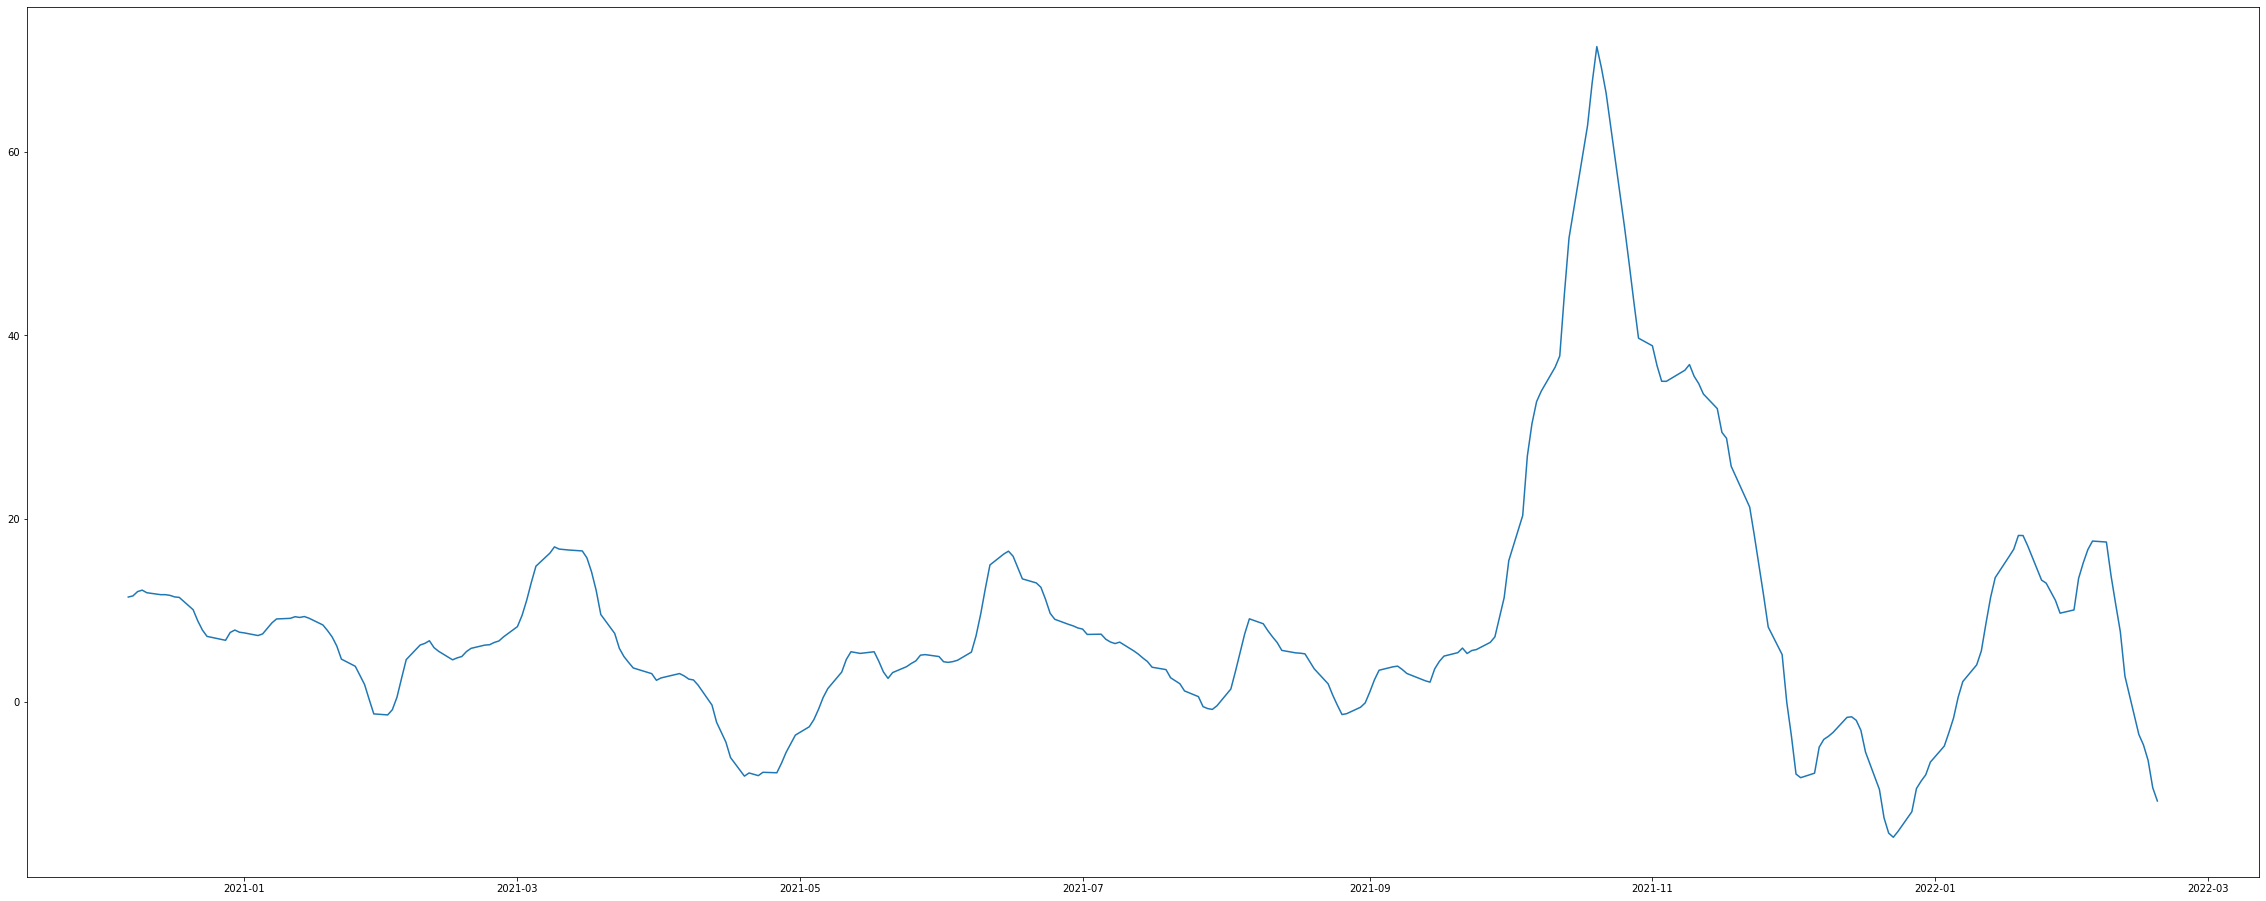

In [ ]:
plt.plot(data['Awesome'][-300:])

In [ ]:
class Feature:
   def returns(self,data,period=1):
     
     d = np.log(data/ data.shift(period))
     return d
   def direction(self,df):
     d = df["Adj Close"]
     d = self.returns(d)
     d = np.where( d >= 0, +1,-1 )
     return d
   def change(self,data,period=1):
      d = data - data.shift(period)
      return d
    
   def SMA(self,data,period = 14):
      ma = data.rolling(period).mean()
      return ma   

   def MACD(self,data,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    ma_fast = data.ewm(span=a,min_periods=a).mean()
    ma_slow = data.ewm(span=b,min_periods=b).mean()
    macd = ma_fast-ma_slow
    signal = macd.ewm(span=c,min_periods=c).mean()
    return signal
  
   def EF(self,df,window=10):
    '''ehler fishher transform'''
    a = list(df.columns).index("Adj Close")
    b = list(df.columns).index("Low")
    c = list(df.columns).index("High")
    xa = np.zeros((len(df),1),dtype=np.float32)
    end = len(df)
    for i in range(end):      
      xa[i] = (df.iloc[i,a] - df.iloc[i-window:i,b].min() ) / (df.iloc[i-window:i,c].max()-df.iloc[i-window:i,b].min() + 10**-15)

    xb = 2*xa - 1
    for i in range(len(xb)):
      if xb[i] == 1:
        xb[i] = 0.999
      elif xb[i] == -1:
        xb[i] = -0.999
    xc = 0.5*np.log(abs(1+xb)/abs(1-xb)) 
    return xc 
     
   def Awesome(self,df,sa = 5, sb = 34):
     xa = df["Adj Close"].rolling(sa).mean()
     xb = df["Adj Close"].rolling(sb).mean()
     xc = xa - xb
     return xc

   def custom_signal_1(self,column='Adj Close MA 20'):
    " peaks and troughs of SMA "
    res,_ = find_peaks(self.data[column])
    res2,_ = find_peaks(-self.data[column])
    indexes = np.sort(np.concatenate((res,res2),axis=-1))
    peaks = self.data.iloc[indexes]['Adj Close']
    dates = self.data.iloc[indexes].index
    self.data['signals']=0
 
    
    for i in range(len(peaks)-3):
      a,b,c,d = peaks[i],peaks[i+1],peaks[i+2],peaks[i+3]
      if (b - a > 0)|(c-a >0):
        if (c-a > 0 )|(d -a > 0 ):
          if (d-a > 0 ):
            self.data.loc[dates[i],['signals']]=3
          
            continue
        
          self.data.loc[dates[i],['signals']]=2
          continue
      
        self.data.loc[dates[i],['signals']]=1
      else:
        
        
        self.data.loc[dates[i],['signals']]=-1
    return 


In [ ]:
path = "/content/drive/MyDrive/Stocks/Models"
name ="lstm_nov_11_4g (1).pth"
name2 ="cdd1_td1_nov_TATAMOTORS.pth"

In [ ]:
plt.rcParams["figure.figsize"] = (40,16)


In [ ]:
def ticker_model_name(ticker,model= "cdd1_td1_nov_"):
  return f"{model}{ticker}.pth"


In [ ]:
class StockData():
  def __init__(self,ticker,min_max=False,step_size=10,categorical=True):
    
    self.data = None
    self.min_max = min_max
    self.min_max_y =None
    self.min_max_data = None
    self.X_label = ["Day","Returns",'SMA14',"Volume","EF","Awesome"]
   
    self.Y_label = ["Direction"]
    self.ticker = ticker
    self.step_size= step_size
    self.prediction_period = 1
    self.feature_obj = Feature()
    self.download(ticker)
    self.features()
    self.data.dropna(inplace=True)
    #self.dataframe_out()
    print(self.data.columns)
    self._pre_minmax()
    self.new_dataset(step_size = self.step_size, pred_period = self.prediction_period)
    self.categorical = categorical
    return 
  
  def dataframe_out(self, columns=None):
    if not columns:
        columns = self.X_label + self.Y_label
    self.data = self.data[columns]
    return self.data

  def features(self,period=1):
    
    self.data["Day"] = self.data.index.dayofweek
    self.data['SMA14'] = self.feature_obj.SMA(self.data['Adj Close'],period=14)
    self.data['Returns'] = self.feature_obj.returns(self.data['Adj Close'])
    self.data['EF'] = self.feature_obj.EF(self.data)
    self.data['Awesome'] = self.feature_obj.Awesome(self.data)
    self.data['Direction'] = self.feature_obj.direction(self.data)
    return
  
  @staticmethod
  def train_test_val_split(X,Y,split = 0.1, val = True,shuffle=True):
    x1,x2,y1,y2 = train_test_split(X, Y, test_size=0.1, shuffle=False)
    if val:
      x1,x3,y1,y3 = train_test_split(x1, y1, test_size=0.1, shuffle=shuffle)
      return x1,x3,x2,y1,y3,y2
    else:
      return x1,x2,y1,y2

  def download(self,ticker,Id=".NS"):
    if self.data == None:
      if type(ticker) == str:
        ticker = ticker + Id
        self.data = yf.download(ticker)
 

  def new_dataset(self, step_size=30, pred_period=1):
    if self.min_max ==True:
      X = self.min_max_x.transform(self.data.iloc[:][self.X_label])
      Y = self.min_max_y.transform(self.data.iloc[:][self.Y_label])
    else:
      X = self.data.iloc[:][self.X_label]
      Y = self.data.iloc[:][self.Y_label]
    data_X,data_Y = [], []
    for i in range(self.data.shape[0]-step_size-pred_period-1):
# here is the inclusion of features for the model
        a =X[i:(i+step_size)]
        data_X.append(a)
        b = Y[i+step_size:i+step_size+pred_period]
        data_Y.append(b)
    self.X,self.Y=  np.array(data_X), np.array(data_Y)
    return
  
  def _pre_minmax(self):
    self.min_max_x = MinMaxScaler()
    self.min_max_y = MinMaxScaler()
    self.min_max_x.fit(self.data[self.X_label])
    self.min_max_y.fit(self.data[self.Y_label])
    return 




class CustomTimeSeries(Dataset):
    def __init__(self, x,y,catagorical = True):
        x = np.reshape(x, (x.shape[0],x.shape[1],x.shape[2]))
        self.features = x.astype(np.float32)
        self.labels = y.astype(np.float32)
        
        
  

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        x = self.features[idx,:,:]
        y = self.labels[idx]
        return x, y



#prepare everything

def prepare(tickers=[],min_max=False,batch=1,shuffle=False,id=".NS"):
  X ,Y = [],[]
  k=1
  assert type(tickers) == list
  for ticker in tickers:
    data = StockData(ticker=ticker,min_max=min_max)
    x,y = data.X,data.Y
    if k==1:
      X = x
      Y = y
    else:
      X = np.concatenate([X,x],0)
      Y = np.concatenate([Y,y], 0)
    k=k+1
  print(X.shape)
  x_train,x_val,x_test,y_train,y_val, y_test = data.train_test_val_split(X,Y,shuffle=shuffle)
  x_train= x_train[len(x_train)%batch:]
  y_train = y_train[len(y_train)%batch:] 
  x_val = x_val[len(x_val)%batch:]
  y_val = y_val[len(y_val)%batch:]
  x_test = x_test[len(x_test)%batch:]
  y_test = y_test[len(y_test)%batch:]
  print(f"len x_train {x_train.shape}, y_train {y_train.shape}; x_val{x_val.shape}; y val {y_val.shape} ; x test {x_test.shape} y test {y_test.shape}")
  traindata = CustomTimeSeries(x_train,y_train)
  train_dataloader = DataLoader(traindata, batch_size=batch, shuffle=False)
  valdata = CustomTimeSeries(x_val,y_val)
  val_dataloader = DataLoader(valdata, batch_size=batch, shuffle=False)
  testdata = CustomTimeSeries(x_test,y_test)

  test_dataloader = DataLoader(testdata, batch_size=batch, shuffle=False)
  return train_dataloader, val_dataloader, test_dataloader

In [ ]:
class CNND2(nn.Module):
  def __init__(self,batch,pred_period=10,lookout_days =100,  input_features=6,teacher_enforce=0.5):
    super().__init__()
    self.batch = batch
    self.period = pred_period 
    self.enc_seq_len = lookout_days
    self.input_size = input_features
    
    
    self.device = ("cuda" if torch.cuda.is_available() else "cpu")
    self.teacher_enforce = teacher_enforce
    
    
    self.conv2 = nn.Conv1d(in_channels=6,out_channels = 32,kernel_size=3,stride=1,dilation=1)
    self.conv3 = nn.Conv1d(in_channels=32,out_channels = 64,kernel_size=3,stride=1,dilation=1)
    self.conv4 = nn.Conv1d(in_channels=64,out_channels = 128,kernel_size=3,stride=1,dilation=1)
    self.conv5 = nn.Conv1d(in_channels=128,out_channels = 256,kernel_size=3,stride=1,dilation=1)
    self.conv6 = nn.Conv1d(in_channels=256,out_channels = 256,kernel_size=2,stride=1,dilation=1)

    self.conv7 = nn.Conv1d(in_channels=6,out_channels = 64,kernel_size=3,stride=1,dilation=2)
    self.conv8 = nn.Conv1d(in_channels=64,out_channels = 128,kernel_size=3,stride=1,dilation=2)
    self.conv9 = nn.Conv1d(in_channels = 128,out_channels = 256,kernel_size=5,stride=1,dilation=1)

    self.conv10 = nn.Conv1d(in_channels=512,out_channels = 1024,kernel_size=4,stride=1,dilation=1)
    self.conv11 = nn.Conv1d(in_channels=1024,out_channels = 1024,kernel_size=3,stride=1,dilation=1)   
    
    self.dense1 = nn.Linear(in_features = 256, out_features = 2)
    self.dense2 = nn.Linear(in_features = 64, out_features = 2)
    self.dense3 = nn.Linear(in_features = 64, out_features = 2)
    self.act1 = nn.ReLU()
    self.drop = nn.Dropout()
    self.soft = nn.Sigmoid()
    
    #New line
   
    #self.dense2 = nn.Linear(in_features=self.hidden_size, out_features=1,bias=False)
    
  def forward(self,inp):
    x = inp.permute((0,2,1))
    
    
    x1 = self.conv2(x)
    x1 = self.act1(x1)
    x1 = self.conv3(x1)
    x1 = self.act1(x1)
    x1 = self.conv4(x1)
    x1 = self.act1(x1)
    x1 = self.conv5(x1)
    x1 = self.act1(x1)
    x1 = self.conv6(x1)
    x1 = self.act1(x1)
    

    
    x3 = x1.squeeze()
    

    xout = self.dense1(x3)
    #xout = self.act1(xout)
    #xout = self.dense2(xout)
    
    
    xout = self.soft(xout)
    
    
    
   
   
    return xout

mod = CNND2(32)
mod(i)

tensor([[0.5096, 0.5130],
        [0.5100, 0.5130],
        [0.5097, 0.5130],
        [0.5096, 0.5130],
        [0.5097, 0.5132],
        [0.5096, 0.5130],
        [0.5099, 0.5131],
        [0.5096, 0.5131],
        [0.5096, 0.5130],
        [0.5097, 0.5132],
        [0.5096, 0.5131],
        [0.5099, 0.5131],
        [0.5096, 0.5130],
        [0.5095, 0.5130],
        [0.5098, 0.5133],
        [0.5096, 0.5130],
        [0.5098, 0.5129],
        [0.5097, 0.5130],
        [0.5096, 0.5132],
        [0.5097, 0.5131],
        [0.5095, 0.5128],
        [0.5100, 0.5130],
        [0.5098, 0.5131],
        [0.5097, 0.5130],
        [0.5093, 0.5127],
        [0.5101, 0.5131],
        [0.5099, 0.5130],
        [0.5096, 0.5130],
        [0.5097, 0.5131],
        [0.5097, 0.5130],
        [0.5101, 0.5131],
        [0.5097, 0.5131]], grad_fn=<SigmoidBackward0>)

In [ ]:
for i,j in train_dataloader:
  
  j = mod(i)
  print(j)
  break


torch.Size([32, 128, 1])


In [ ]:

train_dataloader, val_dataloader, test_dataloader =  prepare(tickers=["TRIVENI"],min_max=True,batch=32,shuffle=False,id=".NS")


[*********************100%***********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day', 'SMA14',
       'Returns', 'EF', 'Awesome', 'Direction'],
      dtype='object')
(3953, 10, 6)
len x_train (3200, 10, 6), y_train (3200, 1, 1); x_val(352, 10, 6); y val (352, 1, 1) ; x test (384, 10, 6) y test (384, 1, 1)


In [ ]:
loss = nn.BCELoss()
opt = optim.Adagrad(mod.parameters(),lr=1e-3)
train(mod,train_dataloader,val_dataloader,epochs=50,optimizer=opt,criterion = loss)

Epoch: 1/50
		Going for validation
	Train loss:0.692902.. 	Valid Loss:0.693542..
	Validation loss decreased (inf --> 0.693542).  Saving model ...
	Epoch:1 completed in 0m 1s
Epoch: 2/50
		Going for validation
	Train loss:0.692503.. 	Valid Loss:0.693710..
	Epoch:2 completed in 0m 1s
Epoch: 3/50
		Going for validation
	Train loss:0.692384.. 	Valid Loss:0.693804..
	Epoch:3 completed in 0m 1s
Epoch: 4/50
		Going for validation
	Train loss:0.692292.. 	Valid Loss:0.693854..
	Epoch:4 completed in 0m 1s
Epoch: 5/50
		Going for validation
	Train loss:0.692198.. 	Valid Loss:0.693905..
	Epoch:5 completed in 0m 1s
Epoch: 6/50
		Going for validation
	Train loss:0.692101.. 	Valid Loss:0.693976..
	Epoch:6 completed in 0m 1s
Epoch: 7/50
		Going for validation
	Train loss:0.691989.. 	Valid Loss:0.694045..
	Epoch:7 completed in 0m 1s
Epoch: 8/50
		Going for validation
	Train loss:0.691852.. 	Valid Loss:0.694156..
	Epoch:8 completed in 0m 1s
Epoch: 9/50
		Going for validation
	Train loss:0.691711.. 	Vali

KeyboardInterrupt: ignored

In [ ]:


def load_latest_model(model, name="model.pt", path='/content'):
    """
    Helper function for Load model
    :param model: current model
    :param name: model name
    :return: loaded model default model.pt
    """
    if path:
      name = os.path.join(path,name)
    model.load_state_dict(torch.load(name))
    return model

def train(model, train_loader, test_loader,
          epochs, optimizer, criterion, scheduler=None,
          name="model.pth", path=None,verbose=True):
    """
    Helper function for train model
    :param model: current model
    :param train_loader: train data loader
    :param test_loader: test data loader
    :param epochs: number of epoch
    :param optimizer: optimizer
    :param criterion: loss function
    :param scheduler: scheduler, default None
    :param name: model name, default model.pt
    :param path: model saved location, default None
    :return: model, list of train loss and test loss
    """

    # compare overfitted
    train_loss_data, valid_loss_data = [], []
    # check for validation loss
    valid_loss_min = np.Inf
    # calculate time
    since = time.time()
    categorical = True
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    for epoch in range(epochs):
        if verbose:
          print("Epoch: {}/{}".format(epoch + 1, epochs))
        # monitor training loss
        train_loss = 0.0
        valid_loss = 0.0
        total = 0
        
        e_since = time.time()

        ###################
        # train the model #
        ###################
        model.train()  # prep model for training

        for targets, labels in train_loader:
            # Move input and label tensors to the default device
            targets = targets.float()
            targets, labels = targets.to(device), labels.to(device)
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            ps = model(targets)
            # calculate the loss
            
            if categorical:
              labels = torch.squeeze(labels)
              labels = labels.long()
              labels = nn.functional.one_hot( labels , num_classes = 2)
              labels = labels.float()
            loss = criterion(ps, labels)
            # backward pass: compute gradient of the loss with respect to model parameters
                 
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item() * targets.size(0)

        ######################
        # validate the model #
        ######################
        if verbose:
           print("\t\tGoing for validation")
        model.eval()  # prep model for evaluation
        for data, target in test_loader:
            # Move input and label tensors to the default device
            data, target = data.float(), target.float()
            
  
          
            data, target = data.to(device), target.to(device)
            #target=target.view(-1,1)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            if categorical:
              target = torch.squeeze(target)
              target = target.long()
              target = nn.functional.one_hot( target , num_classes = 2)
              target = target.float()
            # calculate the loss
            loss_p = criterion(output, target)
            
            # update running validation loss
            valid_loss += loss_p.item() * data.size(0)
            # calculate accuracy
            

        # print training/validation statistics
        # calculate average loss over an epoch
        train_loss = train_loss / len(train_loader.dataset)
        valid_loss = valid_loss / len(test_loader.dataset)

        # calculate train loss and running loss
        train_loss_data.append(train_loss * 100)
        valid_loss_data.append(valid_loss * 100)

        if verbose:
          print("\tTrain loss:{:.6f}..".format(train_loss),
              "\tValid Loss:{:.6f}..".format(valid_loss))
            #  "\tAccuracy: {:.4f}".format(1/train_loss)

        if scheduler is not None:
            scheduler.step()  # step up scheduler

        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            if verbose:
              print('\tValidation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), name)
            valid_loss_min = valid_loss
            # save to google drive
            if path is not None:
                new=os.path.join(path,name)
                torch.save(model.state_dict(), new)

        # Time take for one epoch
        time_elapsed = time.time() - e_since
        if verbose:
           print('\tEpoch:{} completed in {:.0f}m {:.0f}s'.format(
            epoch + 1, time_elapsed // 60, time_elapsed % 60))

    # compare total time
    time_elapsed = time.time() - since
    if verbose:
      print('Training completed in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    # load best model
  
    model = load_latest_model(model, name, path)

    
    # return the model
    return [model, train_loss_data, valid_loss_data]


class CustomTimeSeries(Dataset):
    def __init__(self, x,y):
        x = np.reshape(x, (x.shape[0],x.shape[1],x.shape[2]))
        self.features = x.astype(np.float32)
        self.labels = y.astype(np.float32)
  

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        x = self.features[idx,:,:]
        y = self.labels[idx]
        return x, y


def eval(model, test_loader, loss_fn):
#Evaluate testloss 
   losses = []
   model.eval()
   
   for input , target in test_loader:
      input = input.float()
      if torch.cuda.is_available():
        input= input.cuda()
      pred = model(input)
      loss = loss_fn(pred,target)
      losses.append(loss.cpu().detach().numpy())
   #print(f"Losses {loss_fn}: {losses}")
   mean = sum(losses)/len(losses)
   print(f"\nMean loss: {mean}")
   return 




#train(mod,train_dataloader,val_dataloader,epochs=1,optimizer=opt,criterion = loss)

In [ ]:
BATCH = 1
time_step = 30

SyntaxError: ignored

In [ ]:
import torch.nn.functional as F
from torch.autograd import Variable
class tradeloss(nn.Module):
  def __init__(self):
    super().__init__()
    self.device = "cuda:0" if torch.cuda.is_available() else 'cpu'
  def __str__(self):
    return 'tradeloss_1'
  def forward(self,pred,target):
    pred,target = pred.squeeze(),target.squeeze()
    y_true_next = target[:,1:]
    y_pred_next = pred[:,1:]
    y_true_tdy = target[:,:-1]
    y_pred_tdy = pred[:,:-1]


    y_true_diff = y_true_next - y_true_tdy
    y_pred_diff = y_pred_next - y_pred_tdy

    standard = torch.zeros_like(y_pred_diff)
    y_true_move = torch.gt(y_true_diff,standard)
    y_pred_move = torch.gt(y_pred_diff,standard)

    condition = torch.ne(y_true_move,y_pred_move)

    alpha =1000*torch.ones_like(y_pred_tdy,dtype=torch.float32,device=self.device)
    ones = torch.ones_like(y_pred_tdy,dtype=torch.float32,device=self.device)
    indexes = torch.where(y_true_move != y_pred_move,alpha,ones)
    ones = torch.ones((pred.shape[0],1),dtype=torch.float32, device=self.device)
    indexes = torch.cat([indexes,ones],dim=1)
    indexes = indexes.to(self.device)
    diff = torch.absolute(pred - target) * indexes
    y = torch.tensor([[i+1 for i in range(diff.shape[1])]], dtype = torch.float32, device=self.device, requires_grad=True) # peanlize more on earlier time predictions
    y = y.broadcast_to((diff.shape[0],diff.shape[1]))     #broadcast
    
    diff = diff*y                   #multiply with diff
    
    loss = torch.mean(diff, 1)
    
    loss_overall = torch.mean(loss)
    
    return loss_overall

class tradeloss_2(nn.Module):
  def __init__(self):
    super().__init__()
    self.device = "cuda:0" if torch.cuda.is_available() else 'cpu'
    self.penalty = 0
  def __str__(self):
    return 'tradeloss_2'
  def forward(self,pred,target):
    pred,target = pred.squeeze(),target.squeeze()
    y_true_next = target[:,1:]
    y_pred_next = pred[:,1:]
    y_true_tdy = target[:,:-1]
    y_pred_tdy = pred[:,:-1]


    y_true_diff = y_true_next - y_true_tdy
    y_pred_diff = y_pred_next - y_pred_tdy

    standard = torch.zeros_like(y_pred_diff)
    y_true_move = torch.gt(y_true_diff,standard)
    y_pred_move = torch.gt(y_pred_diff,standard)

    condition = torch.ne(y_true_move,y_pred_move)

    alpha =1000*torch.ones_like(y_pred_tdy,dtype=torch.float32,device=self.device)
    ones = torch.ones_like(y_pred_tdy,dtype=torch.float32,device=self.device)
    indexes = torch.where(y_true_move != y_pred_move,alpha,ones)
    ones = torch.ones((pred.shape[0],1),dtype=torch.float32, device=self.device)
    indexes = torch.cat([indexes,ones],dim=1)
    indexes = indexes.to(self.device)
    diff = torch.absolute(pred - target) * indexes
    y = torch.tensor([[i+self.penalty for i in range(diff.shape[1],0,-1)]], dtype = torch.float32, device=self.device, requires_grad=True) # peanlize more on earlier time predictions
    y = y.broadcast_to((diff.shape[0],diff.shape[1]))     #broadcast
    
    diff = diff*y                   #multiply with diff
    
    loss = torch.mean(diff, 1)
    
    loss_overall = torch.mean(loss)
    
    return loss_overall


In [ ]:
def plot_data(model,data,random_range,row=10,col=8,days=7,randomized=False):
  preds = np.empty([0,10])
  targets = np.empty([0,10])
  figure, axis = plt.subplots(row ,col)
  model.eval()
  
  for input , target in data:
    input = input.float()
    if torch.cuda.is_available():
      input= input.cuda()
    pred = model(input)
    
    pred = pred.cpu().detach().numpy().squeeze()
    target = target.cpu().detach().numpy().squeeze()
    preds = np.concatenate([pred,preds],axis=0)
    targets = np.concatenate([target,targets],axis=0)
  

  if randomized:
    random = np.random.randint(0,random_range,row*col)
    
  else:  
    random = [i for i in range(random_range,random_range+row*col)]
 
  #pred = pred[random:random+4]
  #target = target[random:random+4]
  k=0
  for i in range(row):
    for j in range(col):
       
       axis[i,j].plot(preds[random[k],:days])
       axis[i,j].plot(targets[random[k],:days])
       
       plt.title(f'{k}')
       k=k+1
       


  return 


def plot_models(model,data):
  for i in model:
    plot_data(i,data)

In [ ]:
def plot_charts(model,data,random_range,row=10,col=8,days=7,clip = 3,randomized=False):
  preds = np.empty([0,110])
  targets = np.empty([0,110])
  figure, axis = plt.subplots(row ,col)
  model.eval()
  
  for input , target in data:
    input = input.float()
    target = target.squeeze()
    if torch.cuda.is_available():
      input= input.cuda()
    pred = model(input)
    prev = input[:,:,-1]
    pred = torch.cat((prev,pred),dim=1)
    target = torch.cat((prev,target),dim=1)
    
    pred = pred.cpu().detach().numpy()
    target = target.cpu().detach().numpy()
    
    
    

    preds = np.concatenate([pred,preds],axis=0)
    targets = np.concatenate([target,targets],axis=0)
  print(preds.shape)

  if randomized:
    random = np.random.randint(0,random_range,row*col)
    
  else:  
    random = [i for i in range(random_range,random_range+row*col)]
 
  #pred = pred[random:random+4]
  #target = target[random:random+4]
  k=0
  for i in range(row):
    for j in range(col):
       
       axis[i,j].plot(preds[random[k],days:-clip])
       axis[i,j].plot(targets[random[k],days:-clip])
       plt.title(f'{k}')
       
       k=k+1
  return

In [ ]:
def chart_todays(ticker,model,days_cutoff = 3000,days_leave=3,pred_period=10):
  data = StockData(ticker,min_max=True)
  df = data.data
  min_max_y = data.min_max_y
  min_max_data = data.min_max_data
  inputs= df[-100:].to_numpy()
  targets = inputs[:,-1]
  
  inputs = min_max_data.transform(inputs)
  targets = min_max_y.transform([targets])
  targets = targets.squeeze()
  inputs = torch.tensor(inputs, dtype=torch.float32)
  batch=mod.batch
  inputs = inputs.unsqueeze(0).broadcast_to((batch,inputs.shape[0],inputs.shape[1]))
  
  outputs = mod(inputs)
  
  tar1 = torch.tensor(targets,dtype=torch.float32 )
  outputs = outputs[-1,:]
  const = torch.repeat_interleave(tar1[-1],(outputs.shape[0]))
  
  preds = torch.cat((tar1,outputs[:-days_leave])).cpu().detach().numpy()
  targets = torch.cat((tar1,const[:-days_leave])).cpu().detach().numpy()
  preds = min_max_y.inverse_transform([preds]).reshape(-1)
  targets = min_max_y.inverse_transform([targets]).reshape(-1)
  plt.plot(preds)
  plt.plot(targets)
  plt.title(f"Ticker : {ticker}, Pred Period: {pred_period-days_leave}",fontsize=22)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=20)
  return

In [ ]:
def n_model_chart_todays(ticker,models,t_model_names,path,days_cutoff = 3000,days_leave=3,pred_period=10):
  
  data = StockData(ticker,min_max=True)
  df = data.data
  df2 = df[-100:]
  print(f"Date: ")
  min_max_y = data.min_max_y
  min_max_data = data.min_max_data
  inputs= df[-100:].to_numpy()
  
  targets = inputs[:,-1]
  
  inputs = min_max_data.transform(inputs)
  targets = min_max_y.transform([targets])
  targets = targets.squeeze()
  inputs = torch.tensor(inputs, dtype=torch.float32)
  batch=models.batch
  inputs = inputs.unsqueeze(0).broadcast_to((batch,inputs.shape[0],inputs.shape[1]))
  
  
  
  tar1 = torch.tensor(targets,dtype=torch.float32 )
  const = torch.repeat_interleave(tar1[-1],(torch.tensor([pred_period],dtype=torch.int32)))
  targets = torch.cat((tar1,const[:-days_leave])).cpu().detach().numpy()
  targets = min_max_y.inverse_transform([targets]).reshape(-1)
  print(targets.shape)
  for i in range(len(t_model_names)):
    nme = ticker_model_name(t_model_names[i])
    load_latest_model(models,nme,path)
    eval(models,test_loader=test_dataloader,loss_fn=loss_fn)
  
    output = models(inputs)
    output = output[-1,:]
    

    pds = torch.cat((tar1,output[:-days_leave])).cpu().detach().numpy()
    pds = min_max_y.inverse_transform([pds]).reshape(-1)
    
    plt.plot(pds,label=f"Model_on_{t_model_names[i]}")
    
  plt.plot(targets,label = "target")
  plt.legend()  
  plt.title(f"Ticker : {ticker}, Pred Period: {pred_period-days_leave}",fontsize=22)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=20)
  plt.grid()
  plt.show()
  return

In [ ]:
for i, j in train_dataloader:
  dec1(enc1(i))
  break

In [ ]:
class StockData2():
  def __init__(self,ticker,min_max=False):
    
    self.data = None
    self.min_max_y =None
    self.min_max_data = None

    self.features = ['Returns','Adj Close MA 20','Volume','Custom_signal']
    self.ticker = ticker
    self.download(ticker)
    self.features()
    self.signals()
    self.data.dropna(inplace=True)
    self.dataframe_out()
    print(self.data.columns)
    self.new_dataset()
    self._pre_minmax()
    return 
  
  def dataframe_out(self, columns = ):
    self.data = self.data[columns]
    return 

  def features(self,roll_ma=[3,10,20],roll_dma=10,shift_dma=3,scle=10):
    self.data['Adj Close MA 3'] = self.data['Adj Close'].rolling(roll_ma[0]).mean()
    self.data['Adj Close MA 20'] = self.data['Adj Close MA 3'].rolling(roll_ma[2]).mean()
    self.data['Adj Close MA 10'] = self.data['Adj Close MA 3'].rolling(roll_ma[1]).mean()
    
    #self.data['d_close'] = 10*(self.data['Adj Close MA']- self.data['Adj Close MA'].shift(shift_dma)).rolling(roll_dma).mean()
    
    #self.data['d_cma'] = self.data['Adj Close MA'] + self.data['d_close']
    
    #self.data['dd_cma'] = self.data['d_cma']- self.data['d_cma'].shift(shift_dma)
    
    return
  def signals(self,column='Adj Close MA 20'):
    
    res,_ = find_peaks(self.data[column])
    res2,_ = find_peaks(-self.data[column])
    indexes = np.sort(np.concatenate((res,res2),axis=-1))
    peaks = self.data.iloc[indexes]['Adj Close']
    dates = self.data.iloc[indexes].index
    self.data['signals']=0
 
    
    for i in range(len(peaks)-3):
      a,b,c,d = peaks[i],peaks[i+1],peaks[i+2],peaks[i+3]
      if (b - a > 0)|(c-a >0):
        if (c-a > 0 )|(d -a > 0 ):
          if (d-a > 0 ):
            self.data.loc[dates[i],['signals']]=3
          
            continue
        
          self.data.loc[dates[i],['signals']]=2
          continue
      
        self.data.loc[dates[i],['signals']]=1
      else:
        
        
        self.data.loc[dates[i],['signals']]=-1
    return 

  @staticmethod
  def train_test_val_split(X,Y,split = 0.1, val = True,val_shuffle=False):
    x1,x2,y1,y2 = train_test_split(X, Y, test_size=0.1, shuffle=False)
    if val:
      x1,x3,y1,y3 = train_test_split(x1, y1, test_size=0.1, shuffle=val_shuffle)
      return x1,x3,x2,y1,y3,y2
    else:
      return x1,x2,y1,y2

  def download(self,ticker,Id=".NS"):
    if self.data == None:
      if type(ticker) == str:
        ticker = ticker + Id
        self.data = yf.download(ticker)
 


  
  def _pre_minmax(self):
    self.min_max_data = MinMaxScaler()
    self.min_max_y = MinMaxScaler()
    self.min_max_data.fit(self.data.to_numpy()[:])
    self.min_max_y.fit(self.data.to_numpy()[:,-1].reshape(-1,1))
    return 

  def min_max(self):
    scaled_X = []
    scaled_Y = []
    for i in range(len(self.X)):
      x = self.min_max_data.transform(self.X[i])
      
      y = self.min_max_y.transform(self.Y[i].reshape(-1,1))
      
      scaled_X.append(x)
      scaled_Y.append(y)
      
    
    self.X_scaled, self.Y_scaled = np.array(scaled_X), np.array(scaled_Y)
    #print(self.Y_scaled.shape)
    return self.X_scaled, self.Y_scaled


  def new_dataset(self, step_size=100, pred_period=10):
    data = self.data.to_numpy()
    self.X,self.Y=  np.array(data[:,:-1]), np.array(data[:,-1])
    return

#prepare everything

def prepare(tickers,min_max=False,batch=32,shuffle=False,id=".NS"):
    X ,Y = [],[]
    k=1
    for ticker in tickers:
      data = StockData(ticker=ticker,min_max=min_max)
      x,y = data.min_max()
      if k==1:
        X = x
        Y = y
      else:
        X = np.concatenate([X,x],0)
        Y  = np.concatenate([Y,y], 0)
      k=k+1
    print(X.shape)
    x_train,x_val,x_test,y_train,y_val, y_test = data.train_test_val_split(X,Y,shuffle=shuffle)
    #x_train= x_train[len(x_train)%batch:]
    #y_train = y_train[len(y_train)%batch:] 
    #x_val = x_val[len(x_val)%batch:]
    #y_val = y_val[len(y_val)%batch:]
    #x_test = x_test[len(x_test)%batch:]
    #y_test = y_test[len(y_test)%batch:]
    print(f"len x_train {x_train.shape}, y_train {len(y_train)}; x_val{x_val.shape}; y val {len(y_val)} ; x test {x_test.shape} y test {len(y_test)}")
    traindata = CustomTimeSeries(x_train,y_train)
    train_dataloader = DataLoader(traindata, batch_size=batch, shuffle=False)
    valdata = CustomTimeSeries(x_val,y_val)
    val_dataloader = DataLoader(valdata, batch_size=batch, shuffle=False)
    testdata = CustomTimeSeries(x_test,y_test)

    test_dataloader = DataLoader(testdata, batch_size=batch, shuffle=False)
    return train_dataloader, val_dataloader, test_dataloader

array([[[ 2.00000000e+00,  2.48966320e+07,  3.73853760e+01, ...,
          1.59437561e+00,  6.98226738e+00,  1.07100677e+00],
        [ 3.00000000e+00,  1.05448350e+07,  3.71104851e+01, ...,
         -1.20952606e+00, -4.67315674e-01, -5.23607254e-01],
        [ 4.00000000e+00,  5.08649400e+06,  3.62858047e+01, ...,
         -3.84849548e-01, -5.22296906e-01, -8.80609512e-01],
        ...,
        [ 0.00000000e+00,  3.71402400e+06,  4.87659264e+01, ...,
         -1.75931549e+00, -5.77274323e-01, -1.40420914e+00],
        [ 1.00000000e+00,  1.97711400e+06,  4.77488213e+01, ...,
         -6.59740448e-01,  0.00000000e+00, -4.75997925e-02],
        [ 2.00000000e+00,  1.80767060e+07,  4.77488213e+01, ...,
          3.46364594e+00,  4.67315674e-01,  1.90401077e+00]],

       [[ 3.00000000e+00,  1.05448350e+07,  3.71104851e+01, ...,
         -1.20952606e+00, -4.67315674e-01, -5.23607254e-01],
        [ 4.00000000e+00,  5.08649400e+06,  3.62858047e+01, ...,
         -3.84849548e-01, -5.22296906e

In [ ]:
#data2 = data[-200:]
dates = data2.index
d = dates[0]

In [ ]:
data2.iloc[1:3]["Adj Close"]

Date
2021-03-25    83.456459
2021-03-26    84.882652
Name: Adj Close, dtype: float64

In [ ]:
def change(data, period=1):
  d = data - data.shift(period)
  return d

data2["c_change"] = change(data["Adj Close"])
data2["o_change"] = change(data["Open"])
data2["h_change"] = change(data["High"])
data2["l_change"] = change(data["Low"])

In [ ]:
data2["change classify"] = np.where((data2['c_change']-data2['c_change'].shift(1))>0,1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


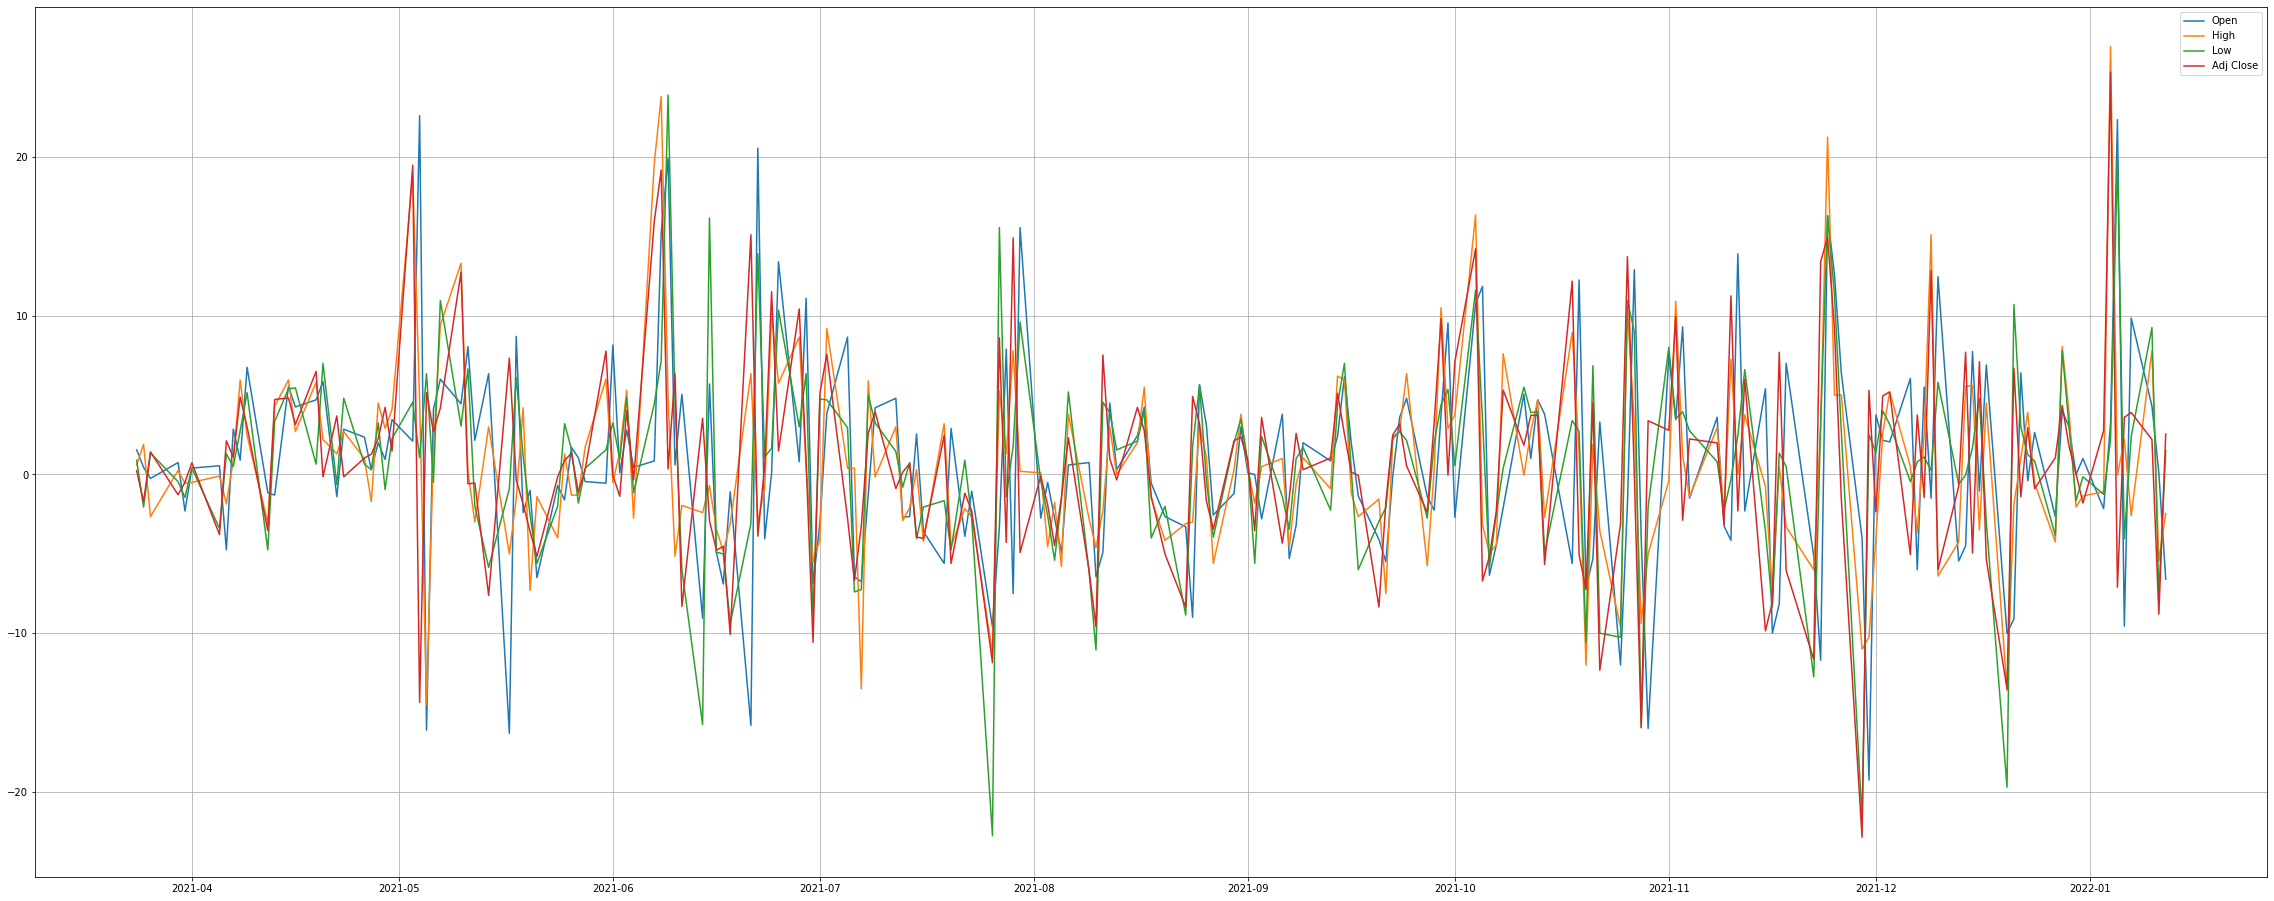

In [ ]:
plt.plot(data2['o_change'],label= "Open")
plt.plot(data2['h_change'],label= "High")
plt.plot(data2["l_change"],label= "Low")


plt.plot(data2['c_change'],label= "Adj Close")

plt.legend()
plt.grid()

In [ ]:
data2["High Df 3"] = data2["High"] - data2['High'].shift(3)
data2["Low Df 3"] = data2["Low"] - data2['Low'].shift(3)

data2["High Df 5"] = data2["High"] - data2['High'].shift(5)
data2["Low Df 5"] = data2["Low"] - data2['Low'].shift(5)

data2["Adj Close Df 3"] = data2["Adj Close"] - data2['Adj Close'].shift(3)

In [ ]:
data2["Adj Close MA 10"] = data2['Adj Close'].rolling(10).mean()

In [ ]:
data2["High MA 5"] = data2['High'].rolling(5).mean()
data2["High MA 10"] = data2['High'].rolling(10).mean()
data2["Low MA 5"] = data2['Low'].rolling(5).mean()
data2["Low MA 10"] = data2['Low'].rolling(10).mean()
data2["HC MA 5 + df 3"] = data2['High MA 5'] + data2["High Df 3"]/2
data2["LC MA 5 + df 3"] = data2['Low MA 5'] + data2["Low Df 3"]
data2["HC MA 10 + df 3"] = data2['High MA 10'] + data2["High Df 3"]/2
data2["LC MA 10 + df 3"] = data2['Low MA 10'] + data2["Low Df 3"]

In [ ]:
data2["High MA 5"] = data2['High'].rolling(5).mean()
data2["High MA 10"] = data2['High'].rolling(10).mean()
data2["High MA 20"] = data2['High'].rolling(20).mean()

data2["Low MA 5"] = data2['Low'].rolling(5).mean()
data2["Low MA 10"] = data2['Low'].rolling(10).mean()
data2["Low MA 20"] = data2['Low'].rolling(20).mean()

In [ ]:
data2 = data2[-180:]

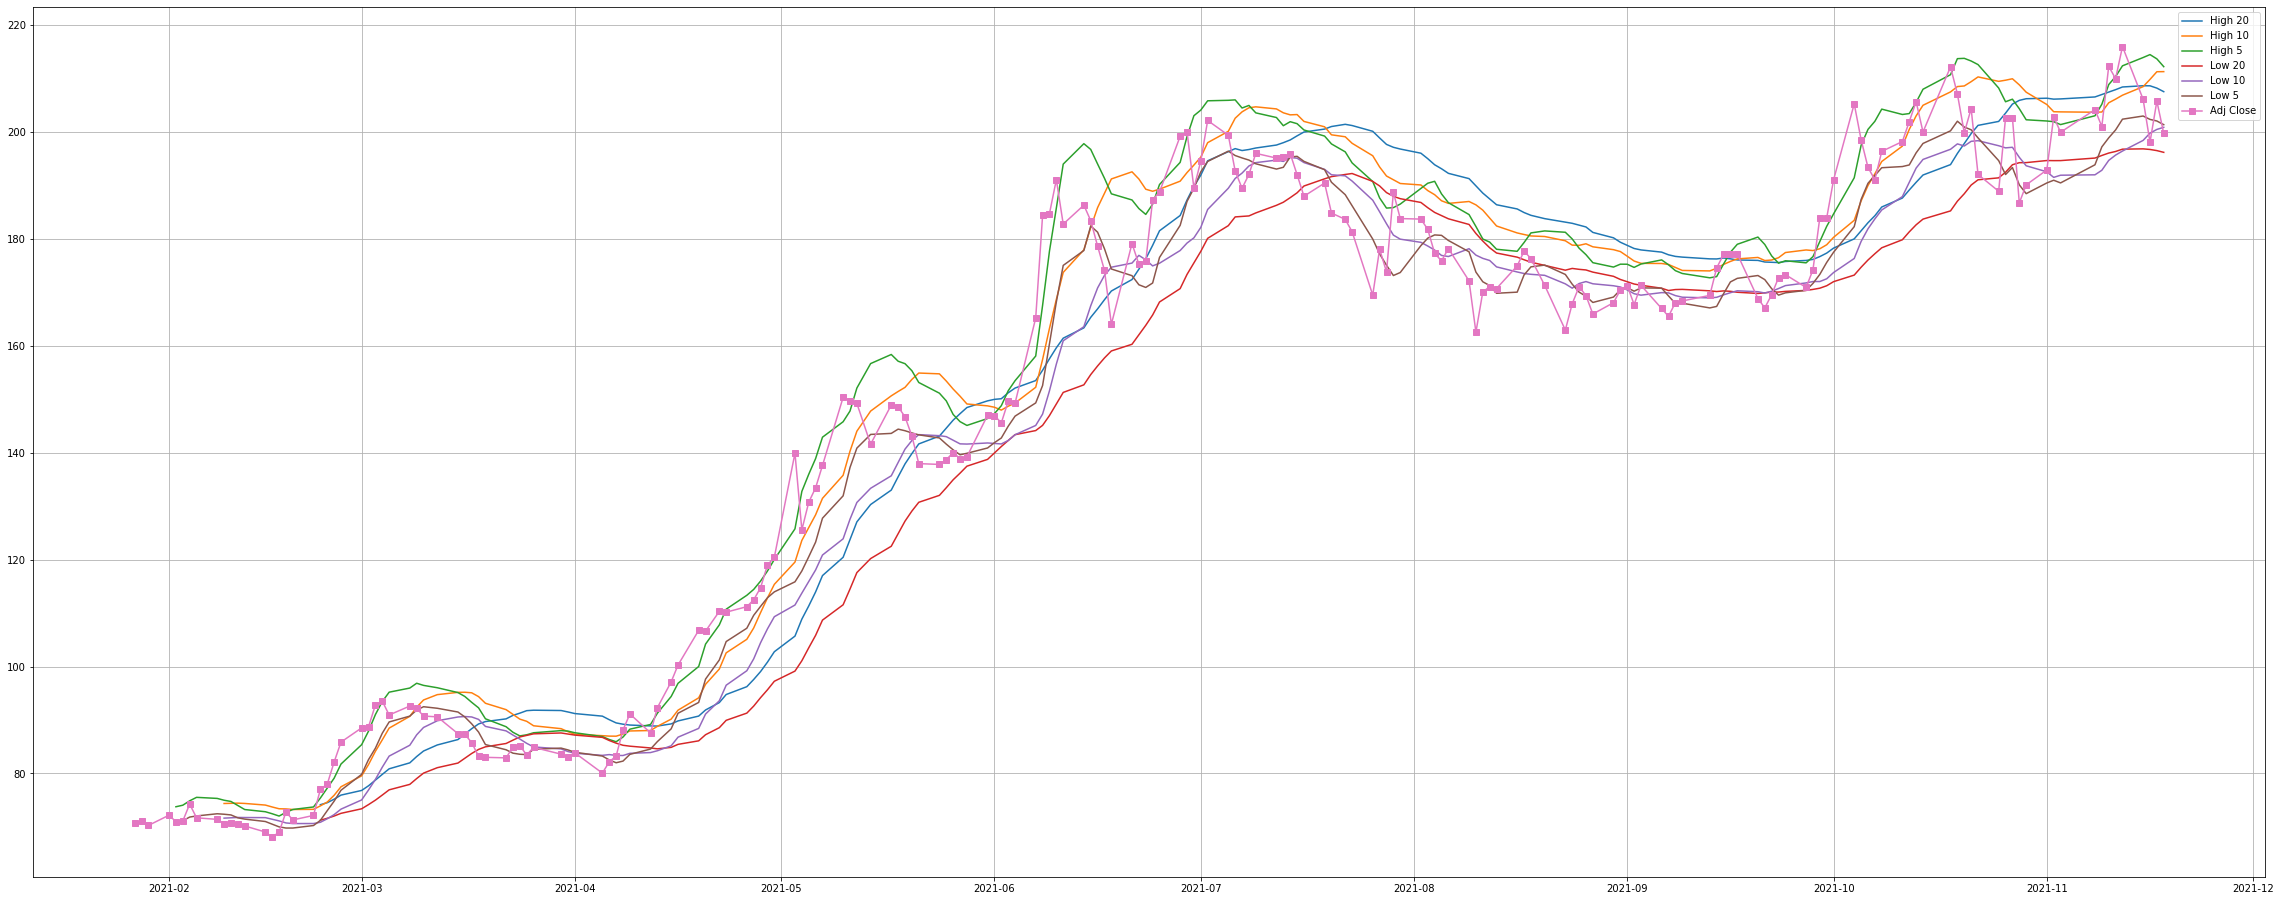

In [ ]:
plt.plot(data2['High MA 20'],label= "High 20")
plt.plot(data2['High MA 10'],label= "High 10")
plt.plot(data2["High MA 5"],label= "High 5")

plt.plot(data2['Low MA 20'],label= "Low 20")
plt.plot(data2['Low MA 10'],label= "Low 10")
plt.plot(data2["Low MA 5"],label= "Low 5")


plt.plot(data2['Adj Close'],label= "Adj Close", marker = 's')

plt.legend()
plt.grid()

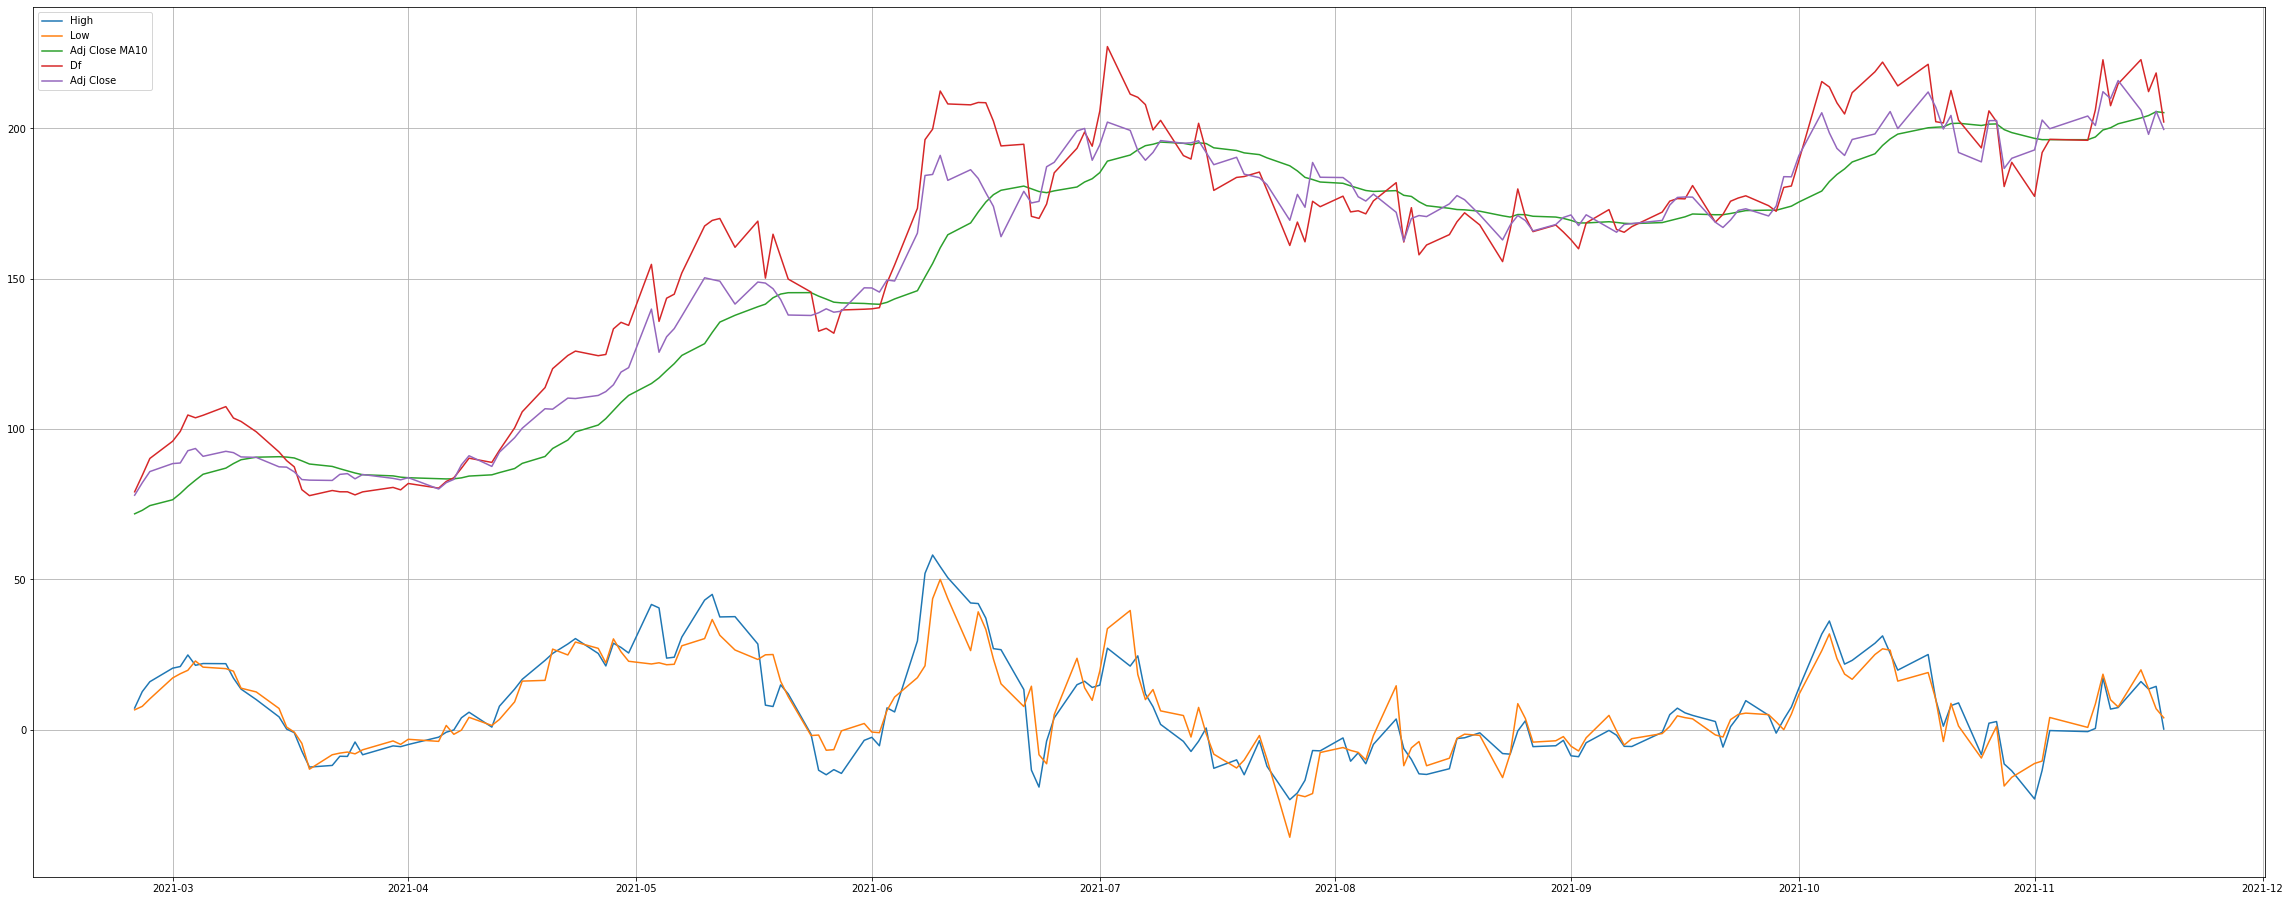

In [ ]:
plt.plot(data2['High Df 10'],label= "High")
plt.plot(data2['Low Df 10'],label= "Low")
plt.plot(data2['Adj Close MA 10'],label= "Adj Close MA10")
plt.plot(data2['Adj Close MA 10 + df'],label= "Df")
plt.plot(data2['Adj Close'],label= "Adj Close")

plt.legend()
plt.grid()